In [21]:
import json
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

In [22]:
sb.set_palette('Set1')

In [23]:
histogram = pd.read_csv('case_time_series.csv')
histogram = histogram.set_index('Date')

In [24]:
target_col = 'cases'

In [25]:
def train_test_split(df, test_size = 0.1):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    
    return train_data, test_data

In [26]:
train, test = train_test_split(histogram, test_size = 0.1)

In [27]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, graph = plt.subplots(1, figsize=(16, 9))
    graph.set_facecolor('#00000000')
    graph.plot(line1, label=label1, linewidth=lw)
    graph.plot(line2, label=label2, linewidth=lw)
    graph.set_ylabel('SARS-CoV-2 Cases (Millions)', fontsize=16)
    graph.set_xlabel('Dates', fontsize=16)
    graph.set_title(title, fontsize=20)
    graph.legend(loc='best', fontsize=12);
    graph.xaxis.set_major_locator(plt.MaxNLocator(15))
    graph.xaxis.grid()
    graph.yaxis.grid()

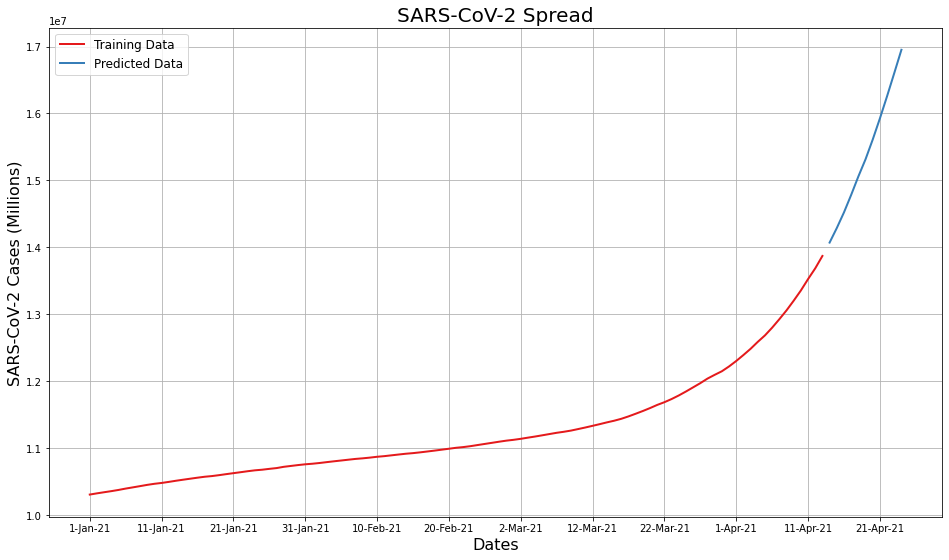

In [29]:
line_plot(train[target_col], test[target_col], 'Training Data', 'Predicted Data', title='SARS-CoV-2 Spread')